# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15665471556                   -0.60    5.7         
  2   -11.16018108555       -2.45       -1.30    1.0    178ms
  3   -11.16039583287       -3.67       -2.33    2.1    189ms
  4   -11.16041672516       -4.68       -3.31    2.7    219ms
  5   -11.16041704741       -6.49       -3.48    3.4    234ms
  6   -11.16041704997       -8.59       -3.65    1.0    158ms
  7   -11.16041705085       -9.06       -3.90    1.1    150ms
  8   -11.16041705121       -9.45       -4.29    1.9    173ms
  9   -11.16041705135       -9.83       -4.65    1.9    174ms
 10   -11.16041705141      -10.27       -4.93    2.0    188ms
 11   -11.16041705144      -10.55       -5.21    2.7    199ms
 12   -11.16041705145      -10.90       -5.80    2.9    218ms
 13   -11.16041705145      -11.99       -6.62    3.0    215ms
Computing bands along kpath:
       Γ -> M -> K -> Γ
Diagonalising Hami

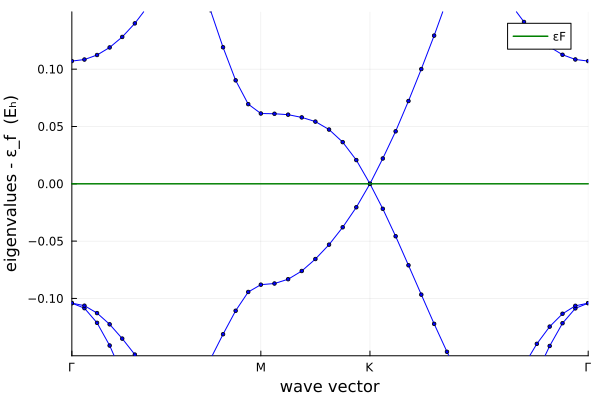

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C, psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
sgnum = 13  # Graphene space group number
kpath = irrfbz_path(model; dim=2, sgnum)
plot_bandstructure(scfres, kpath; kline_density=20)